In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# import xgboost as xgb
# import lightgbm as lgb
# import joblib


import warnings

# warnings.filterwarnings("ignore", module="matplotlib")
# warnings.filterwarnings("ignore", module="seaborn")
warnings.filterwarnings("ignore")

In [43]:


# Load the CSV files into DataFrames
df1 = pd.read_csv('D:/singapore/data/d1.csv')
df2 = pd.read_csv('D:/singapore/data/d2.csv')
df3 = pd.read_csv('D:/singapore/data/d3.csv')
df4 = pd.read_csv('D:/singapore/data/d4.csv')
df5 = pd.read_csv('D:/singapore/data/d5.csv')
     

In [44]:

# Concatenate the DataFrames
data = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [45]:

data.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
727475,2018-08,HOUGANG,EXECUTIVE,559,HOUGANG ST 51,10 TO 12,143.0,Apartment,1992,645000.0,73 years 02 months
716458,2018-02,SERANGOON,3 ROOM,243,SERANGOON AVE 2,04 TO 06,64.0,Simplified,1985,338000.0,66 years 09 months
864004,2024-01,HOUGANG,3 ROOM,321,HOUGANG AVE 5,07 TO 09,67.0,New Generation,1983,382000.0,58 years 02 months
547161,1997-12,SERANGOON,4 ROOM,204,SERANGOON CTRL,04 TO 06,89.0,SIMPLIFIED,1985,272000.0,NaN
896543,2013-07,CLEMENTI,3 ROOM,702,WEST COAST RD,07 TO 09,67.0,New Generation,1980,348000.0,NaN
240844,2007-08,GEYLANG,3 ROOM,24,EUNOS CRES,07 TO 09,59.0,Improved,1977,173000.0,NaN
879997,2012-08,QUEENSTOWN,4 ROOM,91,TANGLIN HALT RD,13 TO 15,90.0,Model A,2008,718000.0,NaN
357195,2011-07,PUNGGOL,5 ROOM,172B,EDGEDALE PLAINS,16 TO 18,110.0,Improved,2004,536000.0,NaN
469938,1995-09,BEDOK,EXECUTIVE,114,BEDOK RESERVOIR RD,04 TO 06,150.0,MAISONETTE,1985,435000.0,NaN
140878,2004-02,BEDOK,3 ROOM,530,BEDOK NTH ST 3,07 TO 09,82.0,New Generation,1979,230000.0,NaN


In [46]:

data.shape

(919884, 11)

In [47]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919884 entries, 0 to 919883
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                919884 non-null  object 
 1   town                 919884 non-null  object 
 2   flat_type            919884 non-null  object 
 3   block                919884 non-null  object 
 4   street_name          919884 non-null  object 
 5   storey_range         919884 non-null  object 
 6   floor_area_sqm       919884 non-null  float64
 7   flat_model           919884 non-null  object 
 8   lease_commence_date  919884 non-null  int64  
 9   resale_price         919884 non-null  float64
 10  remaining_lease      210834 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.2+ MB


In [48]:
data.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [49]:

data.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [50]:

data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,919884.000000,919884.000000,9.198840e+05
mean,95.695267,1988.198266,3.185689e+05
std,25.839231,10.582268,1.685390e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.920000e+05
50%,93.000000,1986.000000,2.950000e+05
75%,113.000000,1996.000000,4.150000e+05
max,307.000000,2022.000000,1.568888e+06


In [51]:
# droping remaining_lease missing values
data = data.dropna()
data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [52]:

data.skew(numeric_only= True)

floor_area_sqm         0.267253
lease_commence_date    0.132144
resale_price           1.015503
dtype: float64

In [53]:
data['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [54]:
list_of_mrt = [
    'Jurong East MRT Station',
    'Bukit Batok MRT Station',
    'Bukit Gombak MRT Station',
    'Choa Chu Kang MRT Station',
    'Yew Tee MRT Station',
    'Kranji MRT Station',
    'Marsiling MRT Station',
    'Woodlands MRT Station',
    'Admiralty MRT Station',
    'Sembawang MRT Station',
    'Canberra MRT Station',
    'Yishun MRT Station',
    'Khatib MRT Station',
    'Yio Chu Kang MRT Station',
    'Ang Mo Kio MRT Station',
    'Bishan MRT Station',
    'Braddell MRT Station',
    'Toa Payoh MRT Station',
    'Novena MRT Station',
    'Newton MRT Station',
    'Orchard MRT Station',
    'Somerset MRT Station',
    'Dhoby Ghaut MRT Station',
    'City Hall MRT Station',
    'Raffles Place MRT Station',
    'Marina Bay MRT Station',
    'Marina South Pier MRT Station',
    'Pasir Ris MRT Station',
    'Tampines MRT Station',
    'Simei MRT Station',
    'Tanah Merah MRT Station',
    'Bedok MRT Station',
    'Kembangan MRT Station',
    'Eunos MRT Station',
    'Paya Lebar MRT Station',
    'Aljunied MRT Station',
    'Kallang MRT Station',
    'Lavender MRT Station',
    'Bugis MRT Station',
    'Tanjong Pagar MRT Station',
    'Outram Park MRT Station',
    'Tiong Bahru MRT Station',
    'Redhill MRT Station',
    'Queenstown MRT Station',
    'Commonwealth MRT Station',
    'Buona Vista MRT Station',
    'Dover MRT Station',
    'Clementi MRT Station',
    'Chinese Garden MRT Station',
    'Lakeside MRT Station',
    'Boon Lay MRT Station',
    'Pioneer MRT Station',
    'Joo Koon MRT Station',
    'Gul Circle MRT Station',
    'Tuas Crescent MRT Station',
    'Tuas West Road MRT Station',
    'Tuas Link MRT Station',
    'Expo MRT Station',
    'Changi Airport MRT Station',
    'HarbourFront MRT Station',
    'Chinatown MRT Station',
    'Clarke Quay MRT Station',
    'Little India MRT Station',
    'Farrer Park MRT Station',
    'Boon Keng MRT Station',
    'Potong Pasir MRT Station',
    'Woodleigh MRT Station',
    'Serangoon MRT Station',
    'Kovan MRT Station',
    'Hougang MRT Station',
    'Buangkok MRT Station',
    'Sengkang MRT Station',
    'Punggol MRT Station',
    'Bras Basah MRT Station',
    'Esplanade MRT Station',
    'Promenade MRT Station',
    'Nicoll Highway MRT Station',
    'Stadium MRT Station',
    'Mountbatten MRT Station',
    'Dakota MRT Station',
    'MacPherson MRT Station',
    'Tai Seng MRT Station',
    'Bartley MRT Station',
    'Lorong Chuan MRT Station',
    'Marymount MRT Station',
    'Caldecott MRT Station',
    'Botanic Gardens MRT Station',
    'Farrer Road MRT Station',
    'Holland Village MRT Station',
    'one-north MRT Station',
    'Kent Ridge MRT Station',
    'Haw Par Villa MRT Station',
    'Pasir Panjang MRT Station',
    'Labrador Park MRT Station',
    'Telok Blangah MRT Station',
    'Bayfront MRT Station',
    'Bukit Panjang MRT Station',
    'Cashew MRT Station',
    'Hillview MRT Station',
    'Beauty World MRT Station',
    'King Albert Park MRT Station',
    'Sixth Avenue MRT Station',
    'Tan Kah Kee MRT Station',
    'Stevens MRT Station',
    'Rochor MRT Station',
    'Downtown MRT Station',
    'Telok Ayer MRT Station',
    'Fort Canning MRT Station',
    'Bencoolen MRT Station',
    'Jalan Besar MRT Station',
    'Bendemeer MRT Station',
    'Geylang Bahru MRT Station',
    'Mattar MRT Station',
    'Ubi MRT Station',
    'Kaki Bukit MRT Station',
    'Bedok North MRT Station',
    'Bedok Reservoir MRT Station',
    'Tampines West MRT Station',
    'Tampines East MRT Station',
    'Upper Changi MRT Station',
    'Woodlands North MRT Station',
    'Woodlands South MRT Station'
]

In [55]:
data['address'] = data['block'] + " " + data['street_name']
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address
656847,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,174 ANG MO KIO AVE 4
656848,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,541 ANG MO KIO AVE 10
656849,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,163 ANG MO KIO AVE 4
656850,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,446 ANG MO KIO AVE 10
656851,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,557 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...,...,...
867676,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62 years 11 months,606 YISHUN ST 61
867677,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62 years 10 months,824 YISHUN ST 81
867678,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,908000.0,62 years 11 months,826 YISHUN ST 81
867679,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,800000.0,63 years,826 YISHUN ST 81


In [56]:
address_list = data['address'].unique()


In [57]:
data['month'] = pd.to_datetime(data['month'])

# Extract the year and month into separate columns
data['year'] = data['month'].dt.year
data['month'] = data['month'].dt.month

In [58]:

# Calculate the remaining lease
data['remaining_lease'] = data['lease_commence_date'] + 99 - data['year']

In [59]:

data['flat_type'] = data['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [60]:

data['flat_type'].value_counts()
     

flat_type
4 ROOM              88419
5 ROOM              52050
3 ROOM              51026
EXECUTIVE           15827
2 ROOM               3354
MULTI GENERATION       80
1 ROOM                 78
Name: count, dtype: int64

In [61]:

data['flat_model'] = data['flat_model'].str.lower()
data['flat_model'] = data['flat_model'].str.title()

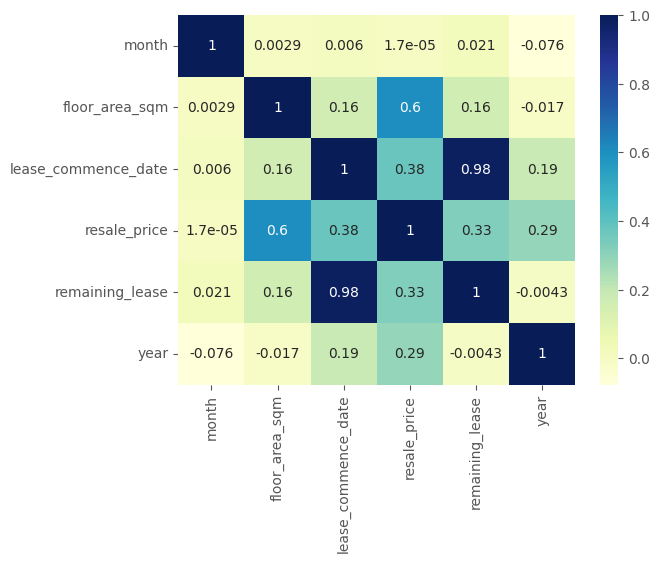

In [62]:
#Visualization



sns.heatmap(data.corr(numeric_only=True),cmap="YlGnBu", annot=True)
plt.show()

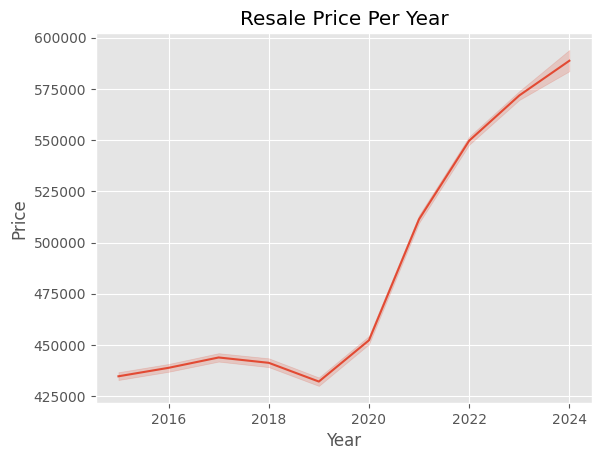

In [63]:

sns.lineplot(data = data, x ='year', y = 'resale_price')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Resale Price Per Year")
plt.show()

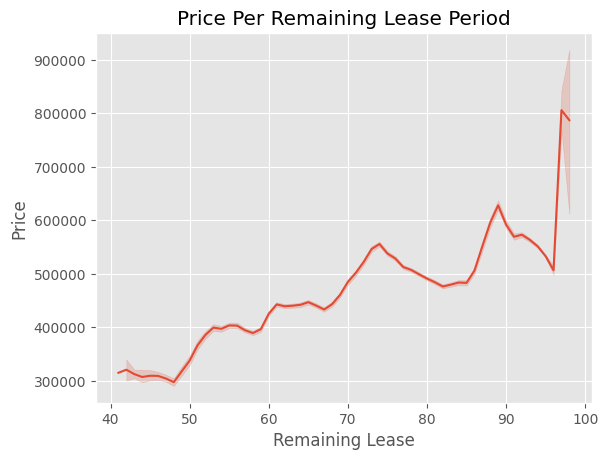

In [64]:

sns.lineplot(data = data, x ='remaining_lease', y = 'resale_price')
plt.xlabel('Remaining Lease', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Price Per Remaining Lease Period")
plt.show()

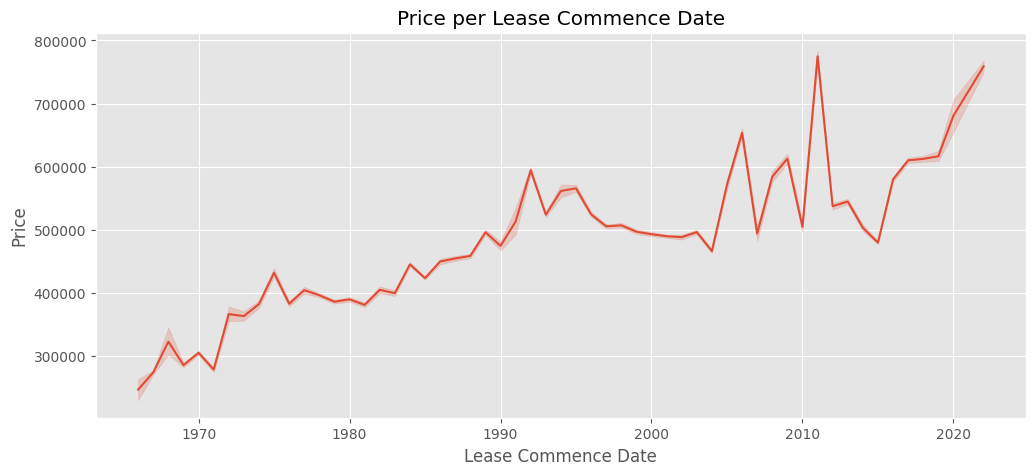

In [65]:

plt.figure(figsize=(12,5))
sns.lineplot(x='lease_commence_date', y='resale_price', data=data)
plt.xlabel('Lease Commence Date')
plt.ylabel('Price')
plt.title('Price per Lease Commence Date')
plt.show()

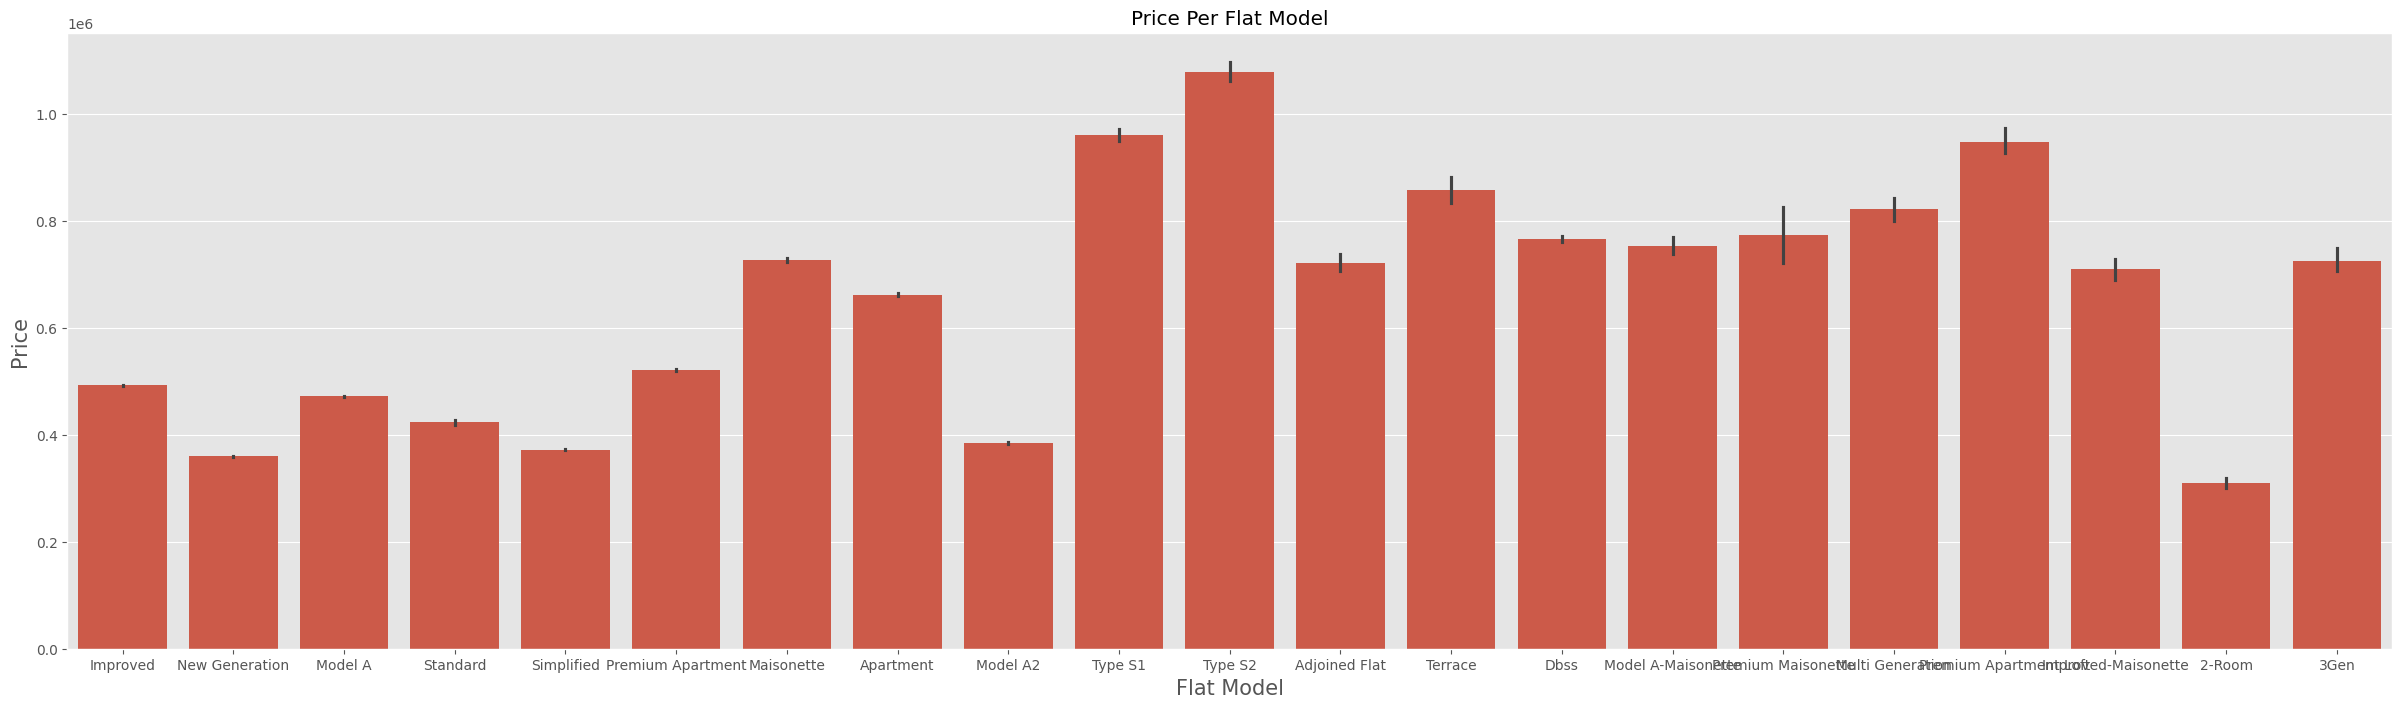

In [66]:

plt.figure(figsize=(30,8))
sns.barplot(x='flat_model',y = 'resale_price', data=data)
plt.xlabel('Flat Model', fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.title("Price Per Flat Model")
plt.show()

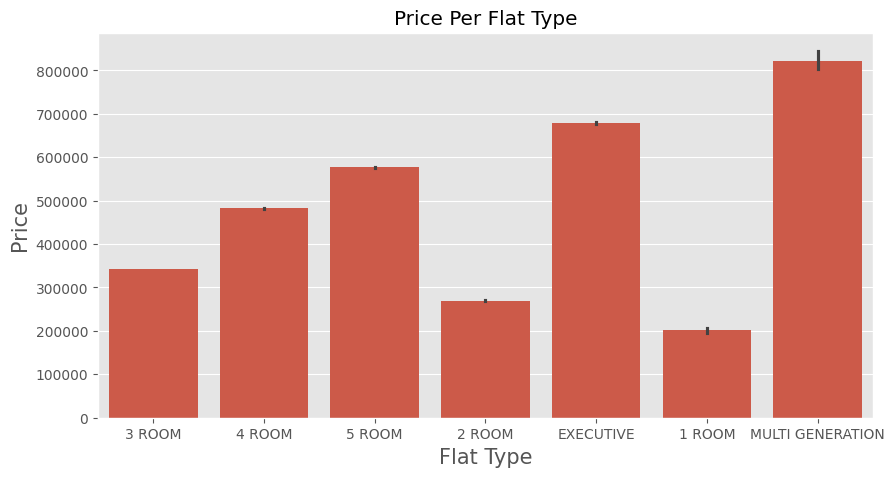

In [67]:

plt.figure(figsize=(10,5))
sns.barplot(data = data, x ='flat_type',y = 'resale_price')
plt.xlabel('Flat Type', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Price Per Flat Type')
plt.show()
     

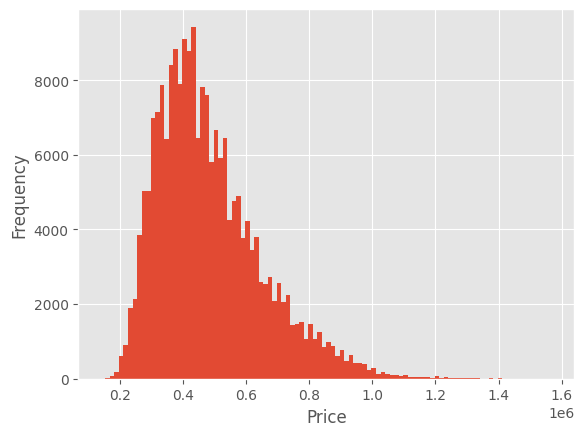

In [68]:
plt.hist(data['resale_price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [69]:

# Calculate the average of the upper and lower bounds and create a new column 'storey_range_avg'
data['storey_range_avg'] = data['storey_range'].apply(lambda x: (int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2)

# Drop the original 'storey_range' column
data.drop(columns=['storey_range'], inplace=True)

# Rename the 'storey_range_avg' column to 'storey_range'
data.rename(columns={'storey_range_avg': 'storey_range'}, inplace=True)

In [70]:

# Create a mapping from flat_type to integer values
flat_type_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION' : 7
}

# Apply the mapping to the 'flat_type' column
data['flat_type_encoded'] = data['flat_type'].map(flat_type_mapping)

# You can drop the original 'flat_type' column if needed
data.drop(columns=['flat_type'], inplace=True)

# If you want to rename the new column to 'flat_type', you can do so
data.rename(columns={'flat_type_encoded': 'flat_type'}, inplace=True)

In [71]:

data.drop(['street_name','block'],axis=1, inplace = True)

In [72]:

data2 = pd.get_dummies(data, columns=['town', 'flat_model'])

In [73]:

from sklearn.model_selection import train_test_split


# Define features (X) and target (y)
X = data2.drop("resale_price", axis=1)
y = data2["resale_price"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [75]:
!pip install scikit-learn numpy



In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [77]:
# Initialize the models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()

# Train the models on the training data
linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predict on the validation set for each model
linear_reg_pred = linear_reg_model.predict(X_val)
decision_tree_pred = decision_tree_model.predict(X_val)
random_forest_pred = random_forest_model.predict(X_val)

# Calculate regression metrics for each model
linear_reg_mae = mean_absolute_error(y_val, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_val, linear_reg_pred)
linear_reg_rmse = np.sqrt(linear_reg_mse)
linear_reg_r2 = r2_score(y_val, linear_reg_pred)

decision_tree_mae = mean_absolute_error(y_val, decision_tree_pred)
decision_tree_mse = mean_squared_error(y_val, decision_tree_pred)
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_r2 = r2_score(y_val, decision_tree_pred)

random_forest_mae = mean_absolute_error(y_val, random_forest_pred)
random_forest_mse = mean_squared_error(y_val, random_forest_pred)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_val, random_forest_pred)

# Display the results for all three models
print("Linear Regression Results:")
print(f"Mean Absolute Error: {linear_reg_mae}")
print(f"Mean Squared Error: {linear_reg_mse}")
print(f"Root Mean Squared Error: {linear_reg_rmse}")
print(f"R2 Score: {linear_reg_r2}")
print()

print("Decision Tree Results:")
print(f"Mean Absolute Error: {decision_tree_mae}")
print(f"Mean Squared Error: {decision_tree_mse}")
print(f"Root Mean Squared Error: {decision_tree_rmse}")
print(f"R2 Score: {decision_tree_r2}")
print()

print("Random Forest Results:")
print(f"Mean Absolute Error: {random_forest_mae}")
print(f"Mean Squared Error: {random_forest_mse}")
print(f"Root Mean Squared Error: {random_forest_rmse}")
print(f"R2 Score: {random_forest_r2}")


ValueError: could not convert string to float: '288B PUNGGOL PL'

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization



In [ ]:
def get_user_input():
    user_input = {}

    st.write("#### Enter the Details:")

    # Display "Month" as a dropdown with month names
    month = st.selectbox("Month", list(month_mapping.keys()))
    user_input['month'] = month_mapping[month]

    year = st.number_input("Year (YYYY)", min_value=1990, max_value=2023)
    user_input['year'] = year

    user_input['floor_area_sqm'] = st.number_input("Floor Area (sqm)")
    user_input['lease_commence_date'] = st.number_input("Lease Commencement Year (YYYY)", min_value=1966, max_value=2023)

    user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    # Display "storey_range" as a select box with input as "01 TO 03"
    storey_range = st.selectbox("Storey Range", storey)
    user_input['storey_range'] = convert_storey_range(storey_range)

    # Display "flat_type" as a dropdown with user-friendly names
    flat_type = st.selectbox("Flat Type", list(flat_type_mapping.keys()))
    user_input['flat_type'] = flat_type_mapping[flat_type]

    # Town selection
    town = st.selectbox("Town", all_towns)
    user_input['town'] = town

    # Flat model selection
    flat_model = st.selectbox("Flat Model", all_flat_model)
    user_input['flat_model'] = flat_model

    return user_input


In [ ]:
import requests

url = 'https://ipv4.icanhazip.com'
response = requests.get(url)
if response.status_code == 200:
    ip_address = response.text.strip()
    print("Your external IP address is:", ip_address)
else:
    print("Failed to fetch the IP address.")


Your external IP address is: 120.56.253.174


In [ ]:
!npx localtunnel -p 8501


'npx' is not recognized as an internal or external command,
operable program or batch file.
